RETO | Análisis de empleados en una red de correo electrónico


Alumno: Juan Carlos Medina López

# Importar Librerias y cargar recursos

In [161]:
#Importar las librerias requeridas
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import warnings
import random
warnings.filterwarnings('ignore')


In [162]:
#Recursos
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [163]:
#Carga los datos y crea un dataframe
path ='/content/drive/MyDrive/Colab Notebooks/Data20/'
df_email = path  + 'email-enron-only.mtx'

In [164]:
# Lee edge list
G = nx.read_edgelist( df_email,create_using=nx.DiGraph)

# Paso 1: Construcción de una red


Construye una red no dirigida a partir de dataframe. Utiliza NetworkX para tener una visualización adecuada de la red, puedes manipular el color y tamaño de nodos y arcos.

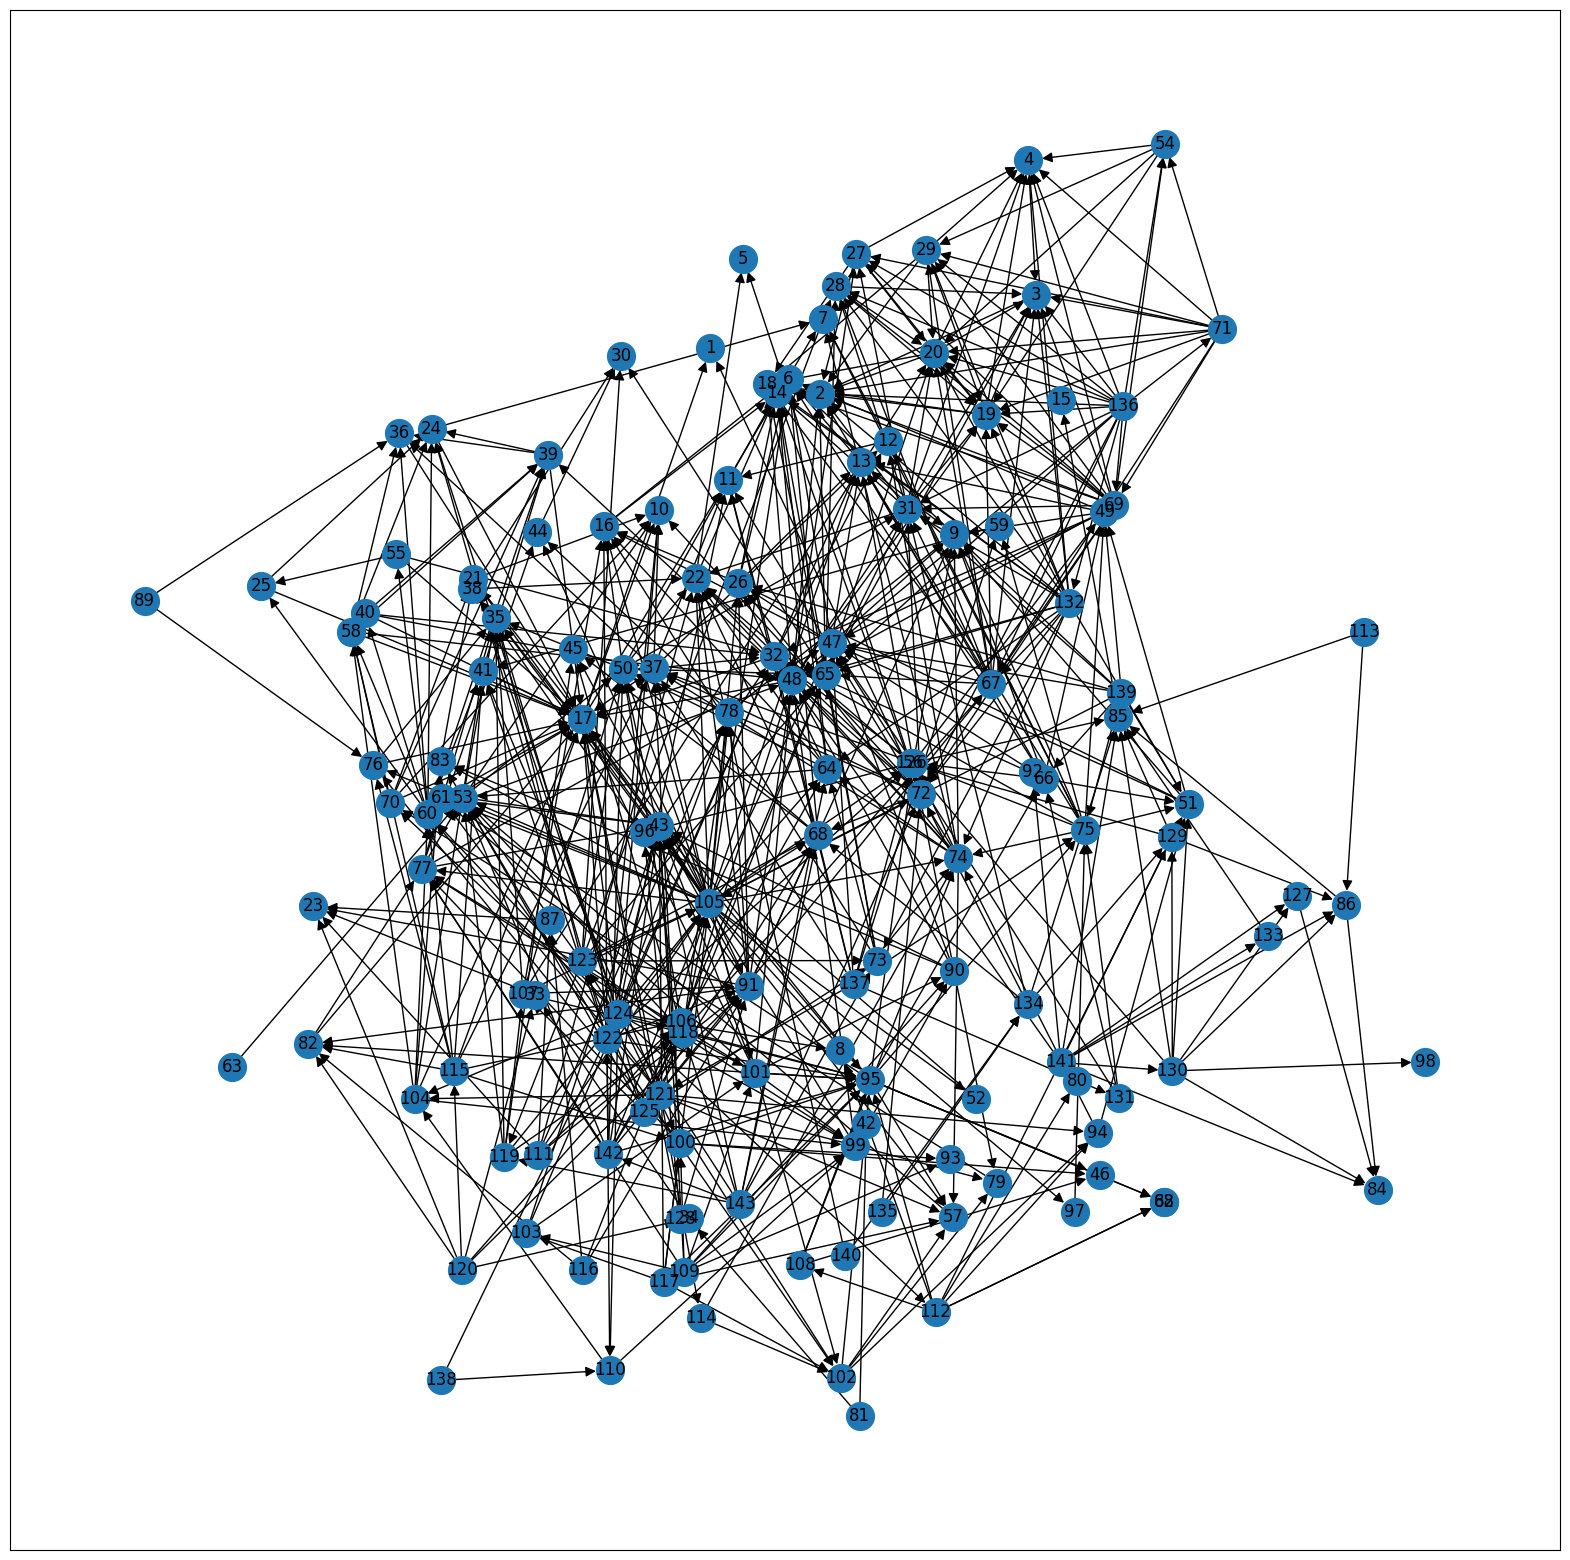

In [165]:
pos = nx.kamada_kawai_layout(G)
fig = plt.figure(figsize=(20, 20))
nx.draw_networkx(G, pos, with_labels=True, node_size=400, arrowsize=15)

In [166]:
nodos= len(G.nodes())
'El número de nodos es: {nodos}'.format(nodos=nodos)

'El número de nodos es: 143'

In [167]:
arcos = len(G.edges())
'El número de arcos es: {arcos}'.format(arcos=arcos)

'El número de arcos es: 623'

In [168]:
#Obtener los grados de todos los nodos
grados = G.degree()

In [169]:
#Grado Máximo
nodo_max, grado_max = max(grados, key=lambda x: x[1])
'Grado máximo; Nodo: {nodo_max}; Grado: {grado_max}'.format(nodo_max=nodo_max, grado_max=grado_max)

'Grado máximo; Nodo: 105; Grado: 42'

In [170]:
#Grado Mínimo
nodo_min, grado_min = min(grados, key=lambda x: x[1])
'Grado mínimo; Nodo: {nodo_min}; Grado: {grado_min}'.format(nodo_min=nodo_min, grado_min=grado_min)

'Grado mínimo; Nodo: 15; Grado: 1'

In [171]:
#Diametro de la red
G_ini = G.copy()
G = G.to_undirected()

diametro = nx.diameter(G);
print(f'El diámetro de la red no dirigida es: {diametro}')

El diámetro de la red no dirigida es: 8


In [229]:
#Distancia promedio más corta
dpc = nx.average_shortest_path_length(G)
'La distancia promedio más corta es: {dpc}'.format(dpc=dpc)

'La distancia promedio más corta es: 2.967004826159756'

In [173]:
#Es una red Bipartitua
from networkx.algorithms import bipartite
es_bipartita = bipartite.is_bipartite(G)
'La red es bipartita: {es_bipartita}'.format(es_bipartita=es_bipartita)

'La red es bipartita: False'

# Paso 2: Identificación de la red


La red que estas analizando es conexa.  Un grafo conexo puede dividirse en un grafo disconexo al remover ciertos nodos o arcos o ambos. La habilidad de la red para funcionar incluso después de remover nodos o arcos se llama robustes o resiliencia. Con ayuda de NetworkX responde lo siguiente:

B)	Con ayuda de NetworkX responde lo siguiente:

¿Cuántos y cuáles nodos hay que remover para que la red sea disconexa?

In [174]:
nodos_num_del = nx.node_connectivity(G)
nodos_del = nx.minimum_node_cut(G)
'Número mínimo de nodos para desconectar: {nodos_num_del}; Nodos a remover: {nodos_del}'.format(nodos_num_del=nodos_num_del,nodos_del=nodos_del)

"Número mínimo de nodos para desconectar: 1; Nodos a remover: {'85'}"

¿Cuántos y cuáles arcos hay que remover para que la red sea disconexa?

In [175]:
arcos_num_del = nx.edge_connectivity(G)
arcos_del = nx.minimum_edge_cut(G)
'Número mínimo de arcos para desconectar: {arcos_num_del}; Arcos a remover: {arcos_del}'.format(arcos_num_del=arcos_num_del,arcos_del=arcos_del)

"Número mínimo de arcos para desconectar: 1; Arcos a remover: {('81', '42')}"

Resiliencia

In [176]:
def random_node(g): # select a random node from graph
    return [np.random.choice(g.nodes())]

def dismantle(g, function, **args): # incrementally removes node from a graph and computes size of connected components
    total_nodes = g.number_of_nodes()
    removed_nodes = []
    components = []
    while len(g.nodes()) > 1:
        n = function(g, **args)[0]
        g.remove_node(n)
        removed_nodes.append((len(removed_nodes)+1)/total_nodes)
        comps = list(nx.connected_components(g))
        g_size = 0
        if len(comps)>0:
            g_size  = max([len(c)for c in comps])/total_nodes
        components.append(g_size)
    return removed_nodes, components

def get_sorted_nodes(g, score, reverse=True): # sort nodes
    nodes = score(g)
    if isinstance(nodes, dict):
        nodes = [(k, v) for k, v in nodes.items()]
    srt = sorted(nodes, key = lambda k: k[1], reverse = reverse)
    return [x[0] for x in srt]

def plot_dismantle(x, y):
    plt.plot(x, y)
    plt.xlabel("Removed Nodes")
    plt.ylabel("Giant Component size")
    plt.show()

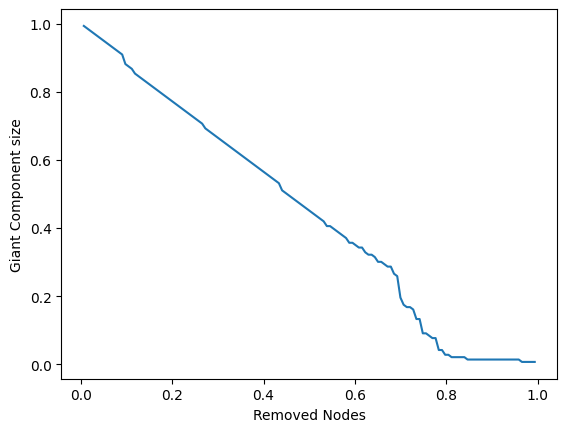

In [222]:
#Random Failure:
h = G.copy()
rn, comps = dismantle(h, random_node)
plot_dismantle(rn, comps)

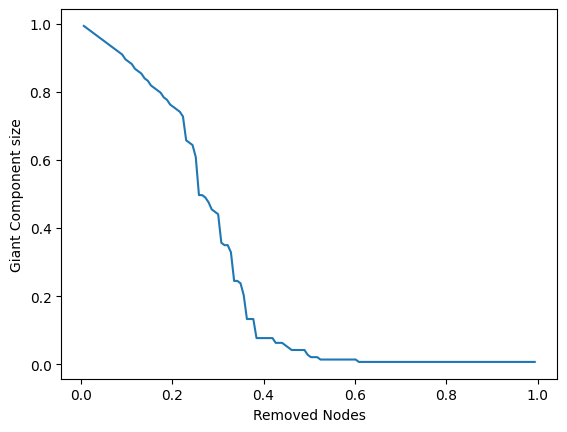

In [223]:
#Targeted Node attack (hubs are removed first)
h = G.copy()
rn, comps = dismantle(h, get_sorted_nodes, score=nx.degree)
plot_dismantle(rn, comps)

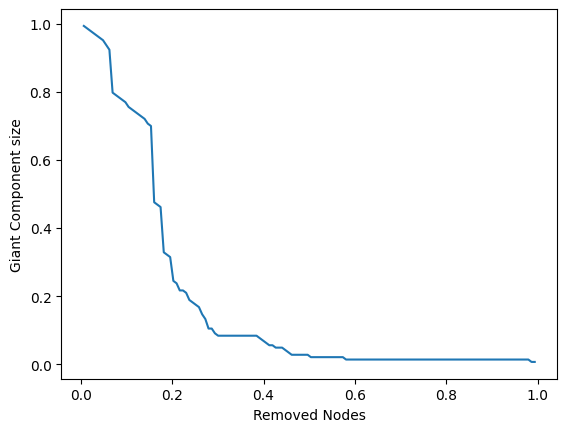

In [179]:
#Targeted Edge Attack (based on Edge Betweenness Centrality)
h = G.copy()
rn, comps = dismantle(h, get_sorted_nodes, score=nx.betweenness_centrality)
plot_dismantle(rn, comps)


Con base en lo anterior, ¿la red es resistente ante fallas, cambios o errores que pudieran ocurrir?

RESPUESTA: Para ataques dirigidos es vulnerable ya que depende del nodo 85 para mantener la integridad de la red. y para el caso de los arcos tambien solo existe 1, (53,63) si se interrumpe, la red se divide.

# Paso 3: Calcula y visualiza las centralidades de la red

Las centralidades miden la importancia de los nodos basados en diferentes criterios.

Con base en diferentes definiciones de importancia de un nodo, calcula la centralidad de grado, de intermediación y de cercanía.

Muestra con un color diferente en la red a los 10 nodos más importantes para cada centralidad.

In [180]:
# Muestra con un color diferente en la red a los 10 nodos más importantes para cada centralidad.
def draw_net(G, pos, measures, measure_name, node_important):

    plt.figure(figsize=(20,20))
    nodo_imp = [x[0] for x in node_important]
    color_map = ['orange' if node in nodo_imp else 'skyblue' for node in G.nodes()]

    nodes = nx.draw_networkx_nodes(G, pos, node_size=400, cmap=plt.cm.plasma,
                                   node_color=color_map,
                                   nodelist=measures.keys())

    labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos, alpha=0.2)

    plt.title(measure_name)
    plt.axis('off')
    plt.show()

Centralidad de grado

In [208]:
degrees = nx.degree_centrality(G) # compute the degree centraliry of all nodes
deg_cen = [(k, v) for k, v in sorted(degrees.items(), key=lambda item: -item[1])]
most_important= deg_cen[0:10]
most_important

[('105', 0.29577464788732394),
 ('17', 0.2112676056338028),
 ('95', 0.1619718309859155),
 ('48', 0.14084507042253522),
 ('132', 0.13380281690140847),
 ('43', 0.13380281690140847),
 ('31', 0.1267605633802817),
 ('74', 0.1267605633802817),
 ('91', 0.1267605633802817),
 ('72', 0.11971830985915494)]

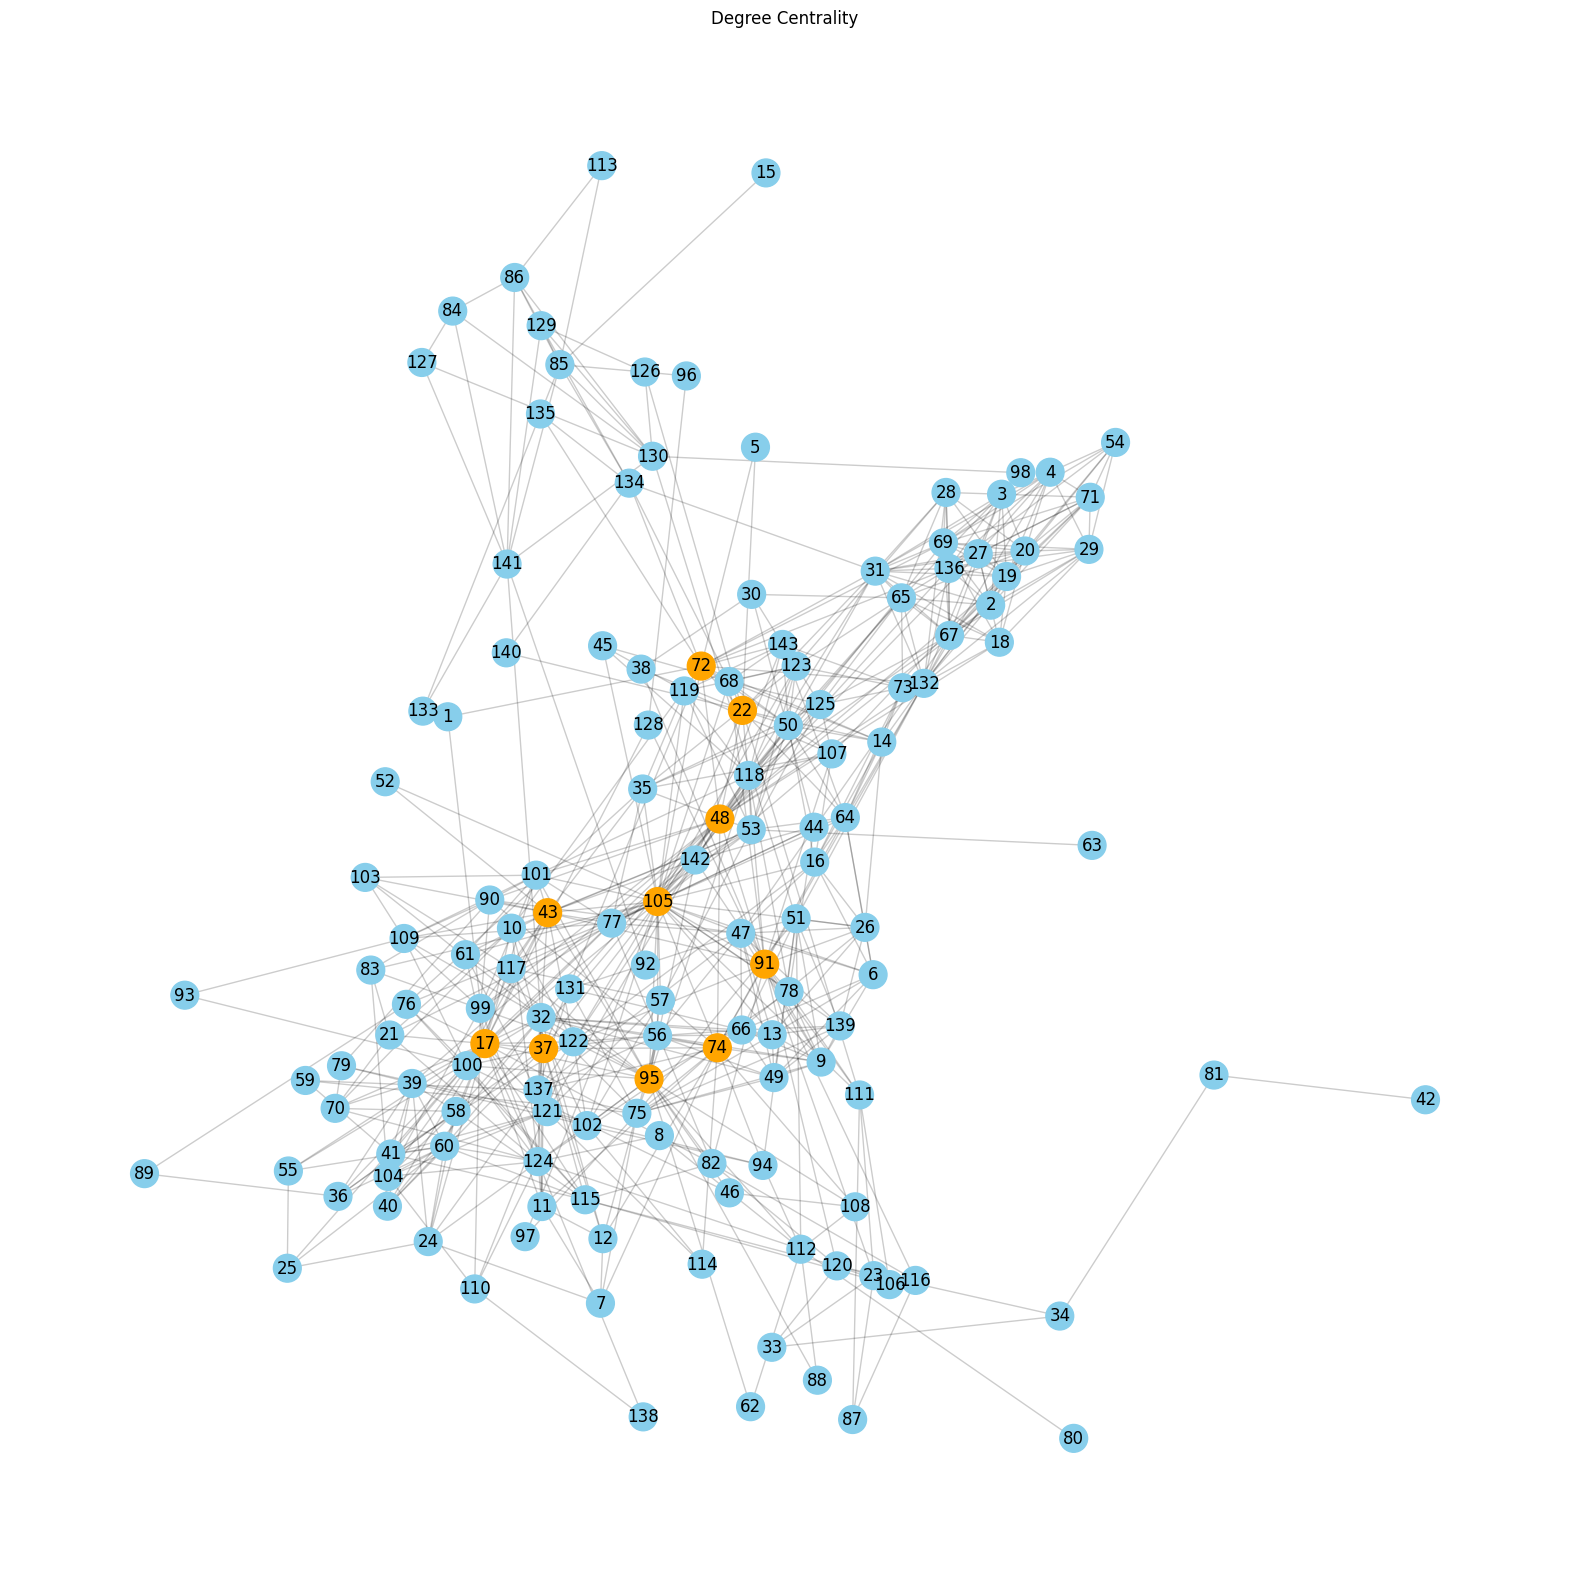

In [228]:
#Muestra con un color diferente en la red a los 10 nodos más importantes para cada centralidad.
pos = nx.spring_layout(G,0.3)
draw_net(G, pos, degrees, 'Degree Centrality',most_important)

Centralidad de intermediación

In [212]:
betweenness = nx.betweenness_centrality(G) # compute the betweenness centraliry of all nodes
bet_cen = [(k, v) for k, v in sorted(betweenness.items(), key=lambda item: -item[1])]
most_important= bet_cen[0:10]
most_important


[('105', 0.1940060434455629),
 ('17', 0.11088210445609471),
 ('48', 0.09673142009207426),
 ('91', 0.09118959870866389),
 ('32', 0.08554735598477585),
 ('95', 0.07579595400584722),
 ('141', 0.06345441275176904),
 ('22', 0.05846852533268458),
 ('72', 0.05833907970763193),
 ('51', 0.05199434696409222)]

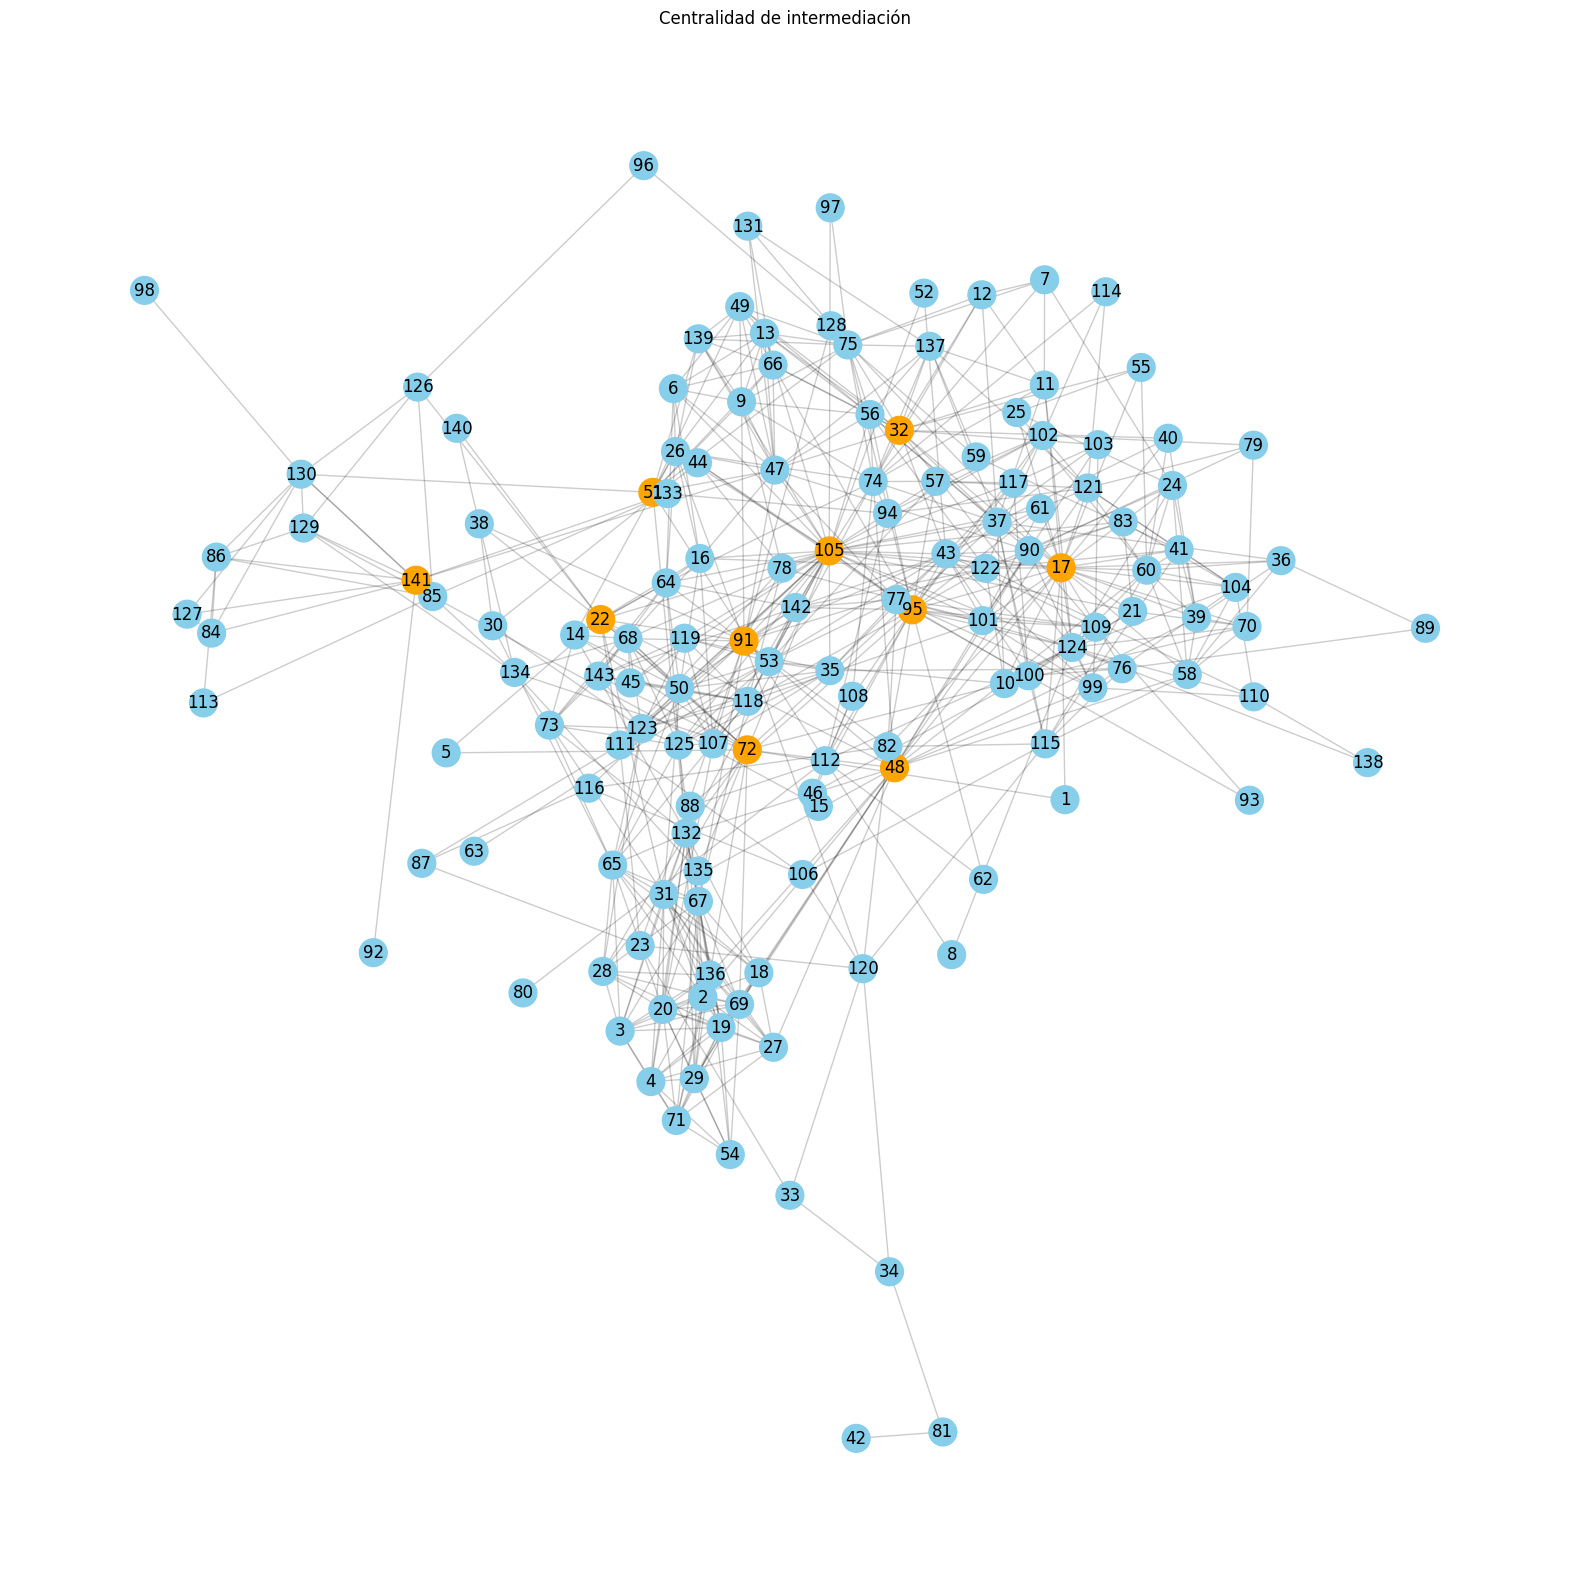

In [213]:
pos = nx.spring_layout(G,0.3)
draw_net(G, pos, betweenness, 'Centralidad de intermediación',most_important)

Centralidad de cercanía

In [214]:
closeness = nx.closeness_centrality(G) # compute the closeness centraliry of all nodes

closeness_cen = [(k, v) for k, v in sorted(closeness.items(), key=lambda item: -item[1])]
most_important= closeness_cen[0:10]
most_important

[('105', 0.5),
 ('17', 0.47019867549668876),
 ('95', 0.4382716049382716),
 ('74', 0.4369230769230769),
 ('37', 0.4369230769230769),
 ('48', 0.43558282208588955),
 ('91', 0.43425076452599387),
 ('43', 0.4316109422492401),
 ('72', 0.42900302114803623),
 ('22', 0.4251497005988024)]

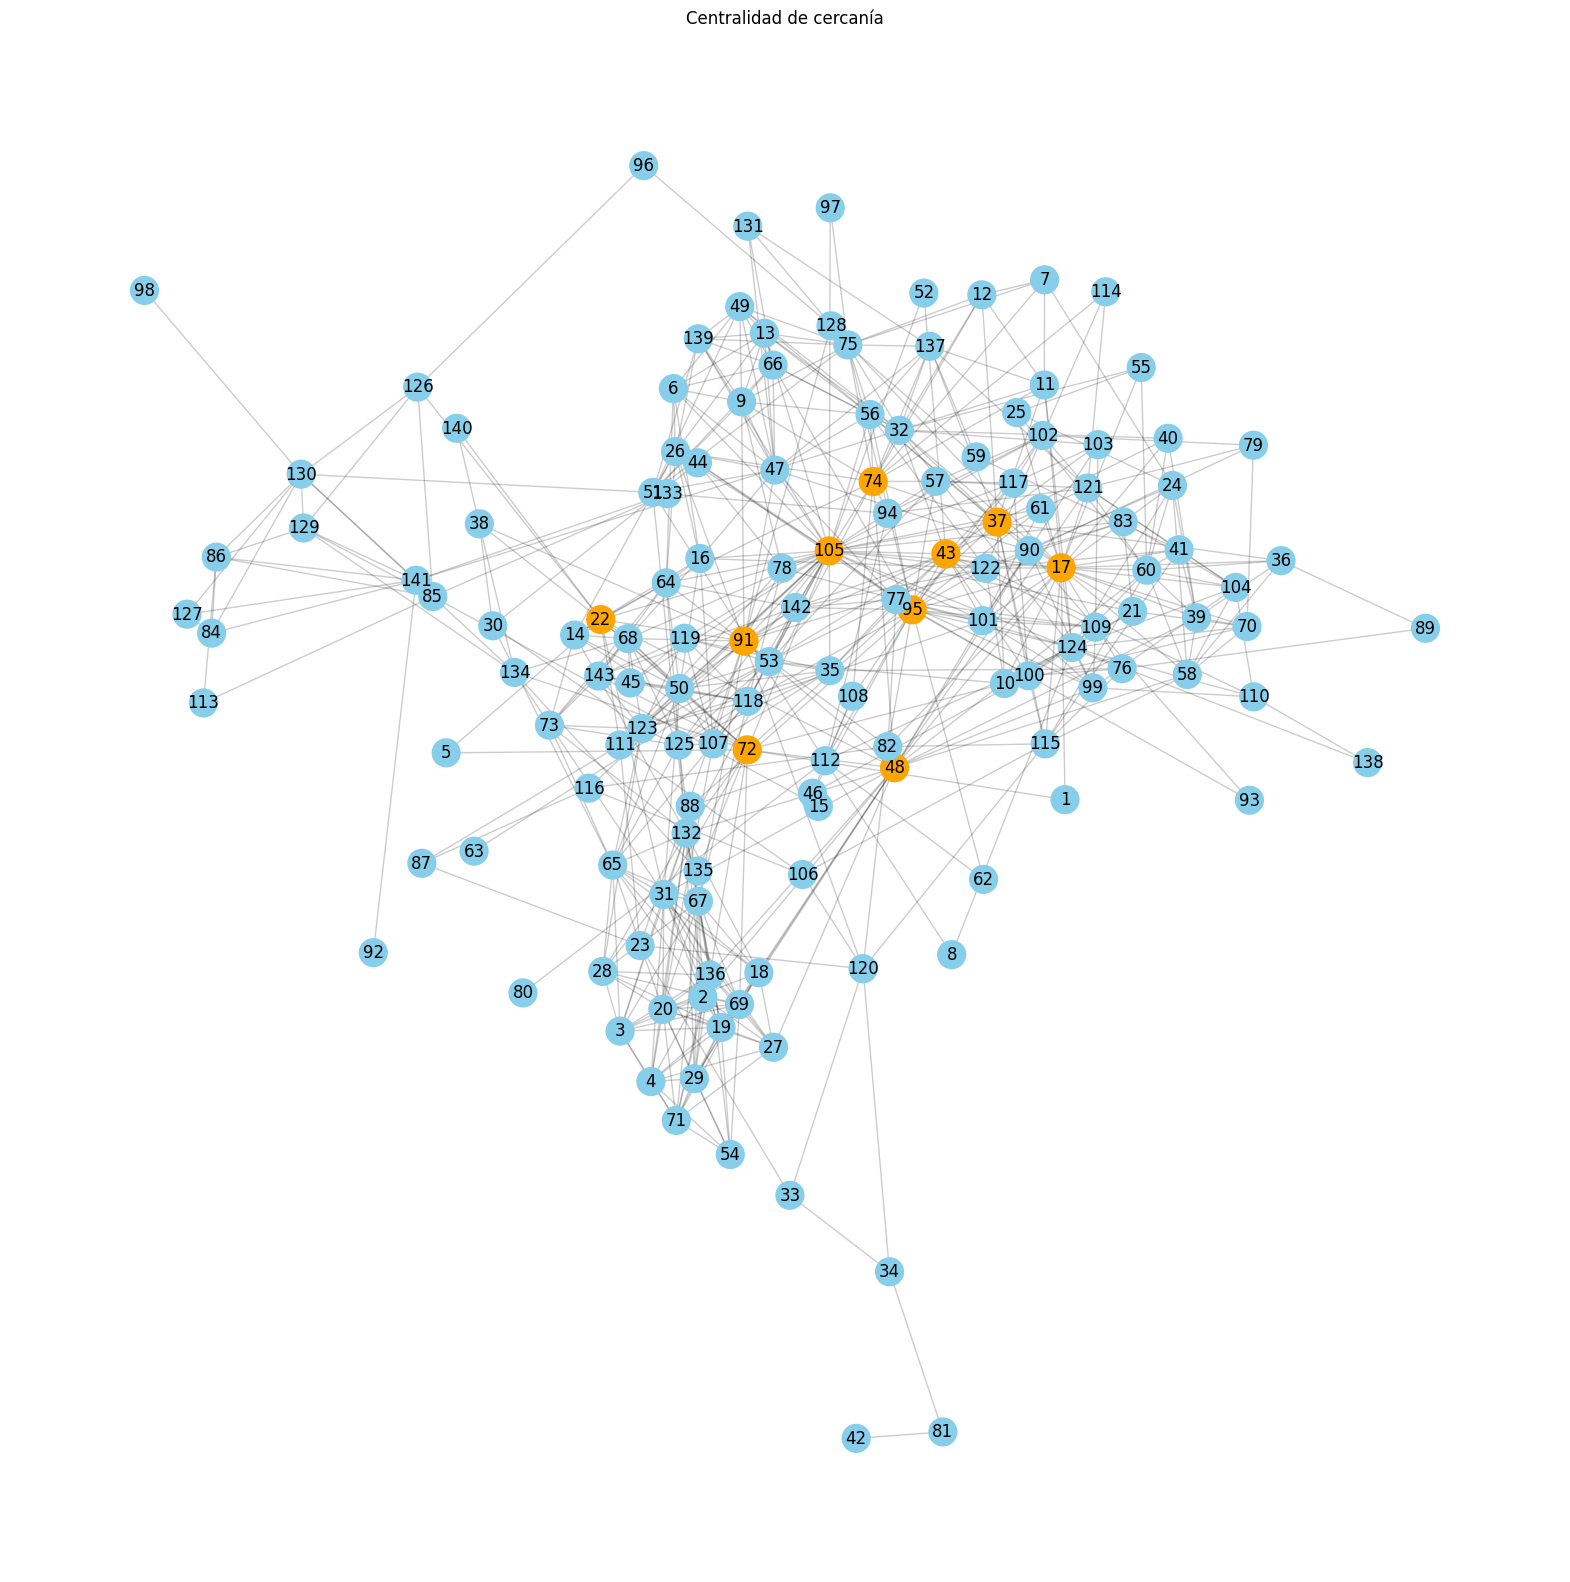

In [215]:
draw_net(G, pos, closeness, 'Centralidad de cercanía',most_important)

# Paso 4: Crea una red dirigida


Ahora sí importa quién manda el correo y quién lo recibe. En esta nueva red calcula el PageRank de los nodos, y para visualizarlos en la red


C)	Anota tus conclusiones:

In [194]:
# Support function to plot networks (only small graphs)
def draw_net2(G, pos, measures, measure_name):

    plt.figure(figsize=(20,20))
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma,
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos, alpha=0.2)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')

    plt.show()

In [224]:
pagerank = nx.pagerank(G)

In [226]:
pagerang_cen = [(k, v) for k, v in sorted(pagerank.items(), key=lambda item: -item[1])]
pagerank_most_important=pagerang_cen[0:5]
pagerank_most_important

[('105', 0.028920022374199314),
 ('17', 0.0223554451933045),
 ('95', 0.017782857050948744),
 ('91', 0.01443512700256879),
 ('124', 0.013862332198921294)]

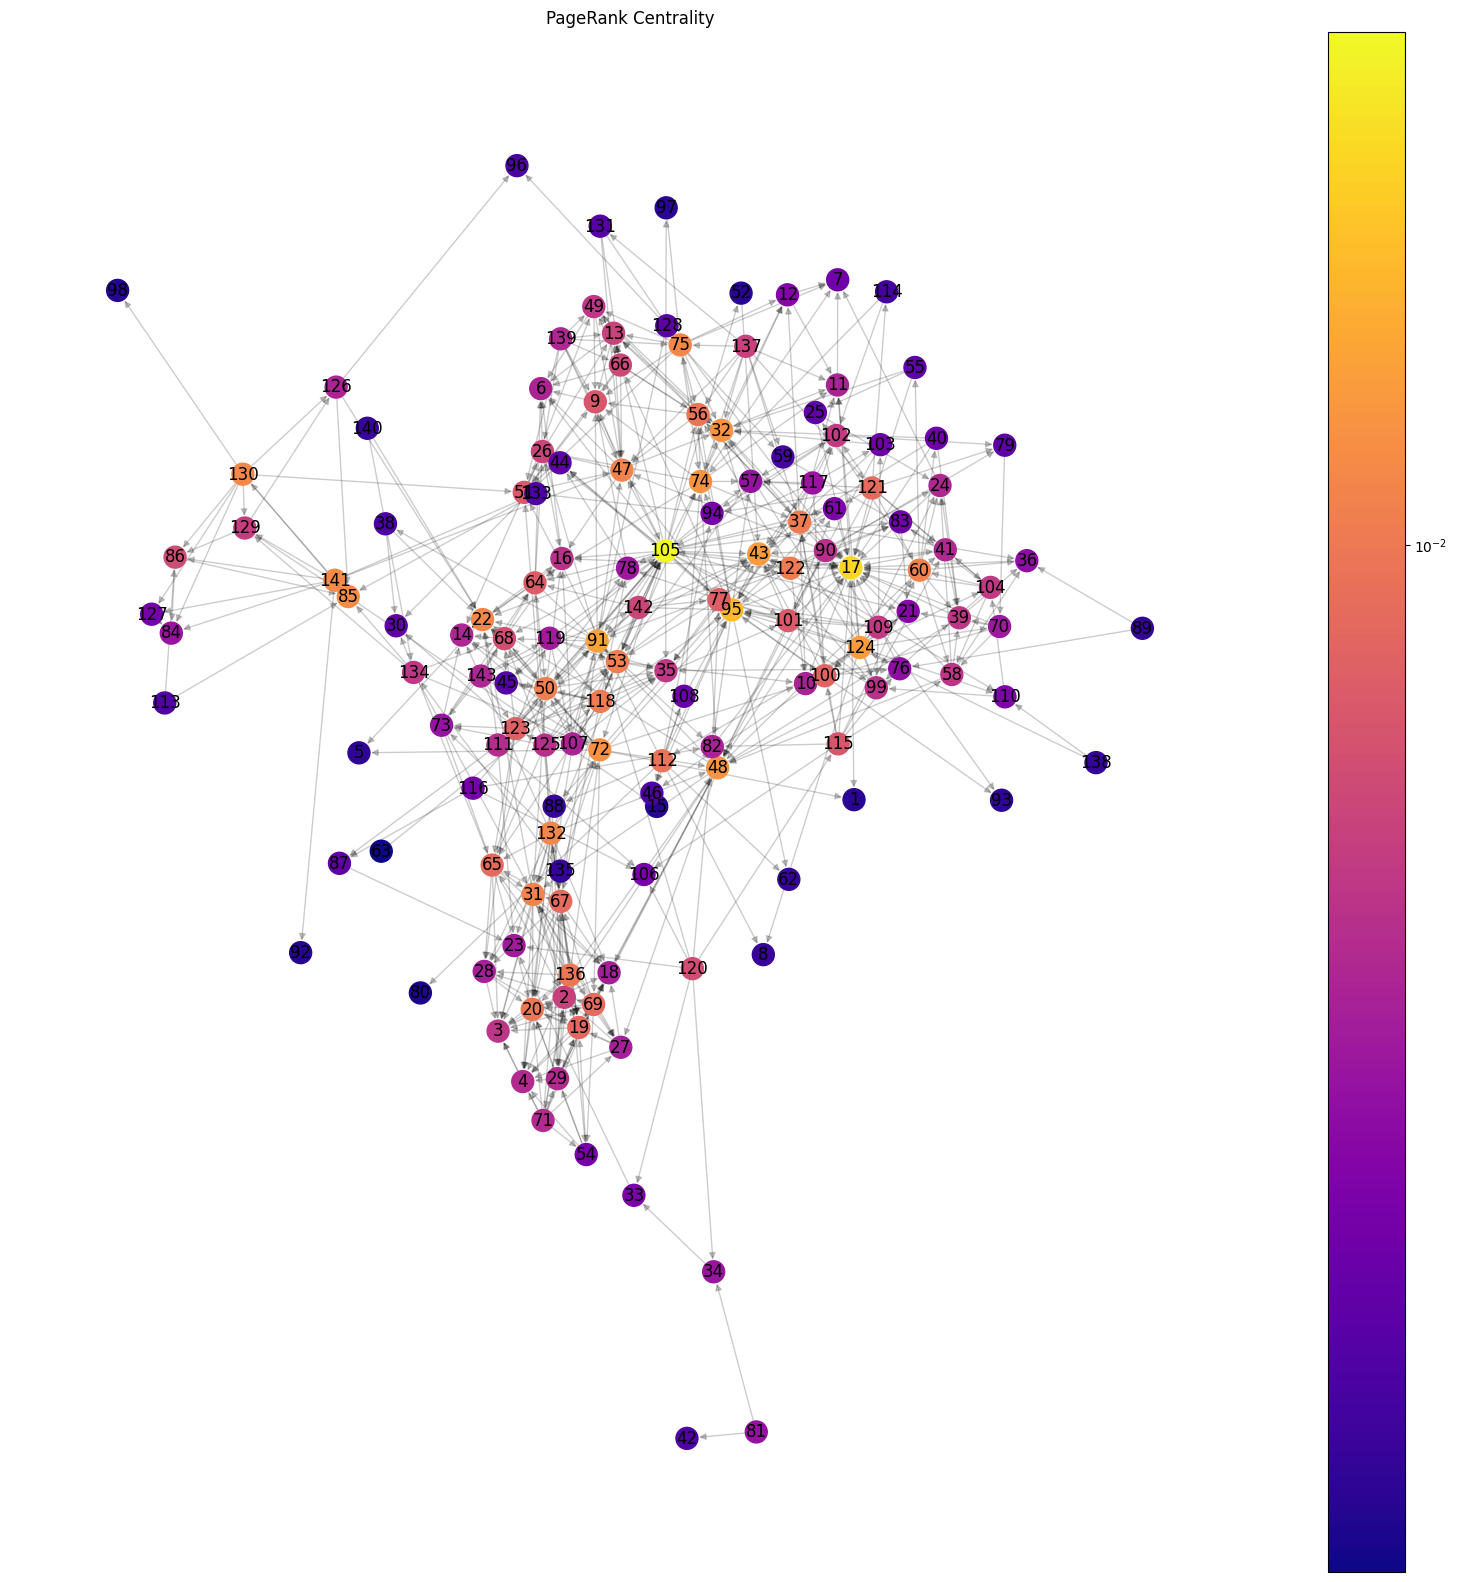

In [227]:
draw_net2(G_ini, pos, pagerank, 'PageRank Centrality')

**Total de empleados, total de interacciones por correo electrónico.**

RESPUESTA:

Total, de empleados: 143

Total, de interacciones por correo: 623



**¿Quién tiene el máximo grado, quién el mínimo, y qué significa?**

RESPUESTA:

Máximo: El nodo 105, Grado 42
Es el nodo con mayor cantidad de conexiones directas. Como un hub de red.

Mínimo: El nodo 15, Grado 1
Es le nodo que solo intercambia correos con una sola persona.



**¿Cuál es el diámetro de la red y qué significa?**

RESPUESTA:

Diámetro de la red: 8

Son los intermediarios que se requieren como máximo para que un correo atraviese la red de un extremo a otro.
Distancia más larga de todos los caminos más cortos entre cualquier nodo de la red



¿Cuál es el promedio de los caminos más corto y qué significa?

RESPUESTA:

Distancia promedio más corta: 2.97

Significa que la mayoría de los nodos están a 3 pasos de distancia promedio.




**¿La red es robusta?, ¿cómo reacciona el sistema antes fallas o ataques?**

RESPUESTA:

De acuerdo a las pruebas de falla aleatoria, ataque dirigido (nodo y arcos).

Es Robusta ante fallo, pero en los ataques es vulnerable.


**Tomando en cuenta las tres medidas de centralidad, ¿cuáles son los nodos más importantes?**

RESPUESTA:

Los nodos 105, 17, 95 y 48 son los que tiene más alto valor en las tres centralidades.

Según el PageRank, ¿quién es el nodo más importante? Y con base a qué se determina su importancia.

RESPUESTA:

Nodo más importante: 105 con un valor de 0.0289

Su importancia se determina por la centralidad de sus vecinos, es decir, es la suma de las centralidades de sus vecinos. Con le objetivo ver su influencia o autoridad dentro de la red.
